# Clustering

Clustering is a branch of unsupervised machine learning models that seeks to learn from the properties of the data by identifying groups or clusters in the dataset. Clustering is different from classification as it seeks to identify a set of similar data points and calling the resulting set a cluster. Selecting an appropriate clustering algorithm is often difficult due to the number of choices available. For a comprehensive survey of clustering algorithms, refer [here](https://link.springer.com/content/pdf/10.1007/s40745-015-0040-1.pdf). The three most popular categories of clustering algorithms are

| Categories               | Clustering Algorithm                                        |
| ------------------------ | ----------------------------------------------------------- |
| Partitional clustering   | divides data objects into non overlapping groups            |
| Hierarchical clustering  | assignments by building a hierarchy                         |
| Density-based clustering | assignments based on the density of data points in a region |

# k-Means Algorithm

The $k$-means algorithm searches for a predetermined number of clusters within an unlabeled dataset and is based on the assumptions that the optimal cluster will have

- “cluster center” which is the mean of all the points belonging to the cluster.
- each point is closer to its own cluster center than to other cluster centers.
Conventional $k$-means algorithm requires only a few steps and follows a two-step process called **Expectation-Maximization** approach. This consists of

- Randomly selecting $k$-centroids or cluster center
- Repeat until converged
    a. E-Step: assign points to the nearest cluster center
    b. M-Step: set the cluster center to the mean
The "E-Step" or "Expectation Step" assigns each data point to its nearest centroid. Then, the "M-Step" or Maximization Step" computes the mean of all the points for each cluster and sets the new centroid. The $k$-means algorithms seeks to find $k$ clusters within a data set. The clusters are chosen to reduce the inertia, the objective function

$$\min_{C_k} \sum_k \sum_{X_k\in C_k} || X_j - \mu_k ||^2$$

, and the centroid of a cluster $\mu_k$ is equal to

$$\mu_k = \frac{1}{|C_k|}\sum_{X_j\in C_k} X_j$$

, where $|C_k|$ is the number of points in cluster $k$.

The cluster assignments are done based on squared Euclidean distance and algorithm tries to minimize the objective function. This process is repeated, iteratively, until the sum of the distance is minimized.

# Implementation

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read components of dow from Yahoo Finance
dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')

dow[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [12]:
# Retrieve stock symbol
dow_stocks = list(dow[1]['Symbol'])
dow_company_name = list(dow[1]['Company'])
dow_stocks

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [18]:
# # Use comprehension to fetch data for multiple fields 
# dow_ohlc = {symbol: yf.download(symbol, start='2010-01-01', end='2022-05-31', auto_adjust=True, progress=False) for symbol in dow_stocks}

# # Save dow_ohlc dict for future use
# np.save('dow_ohlc.npy', dow_ohlc) 

# Load down_ohlc dict 
ohlc = np.load('dow_ohlc.npy', allow_pickle='TRUE').item()
ohlc['MMM'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,55.903355,56.145565,55.620778,55.856258,3043700
2010-01-05,55.708252,55.997559,54.968163,55.506409,2847000
2010-01-06,56.434875,56.919296,56.185941,56.293587,5268500
2010-01-07,56.058090,56.354126,55.250726,56.333942,4470100
2010-01-08,56.307042,56.730907,56.044649,56.730907,3405800


In [23]:
for symbol in dow_stocks:
    high =  ohlc[symbol]['High']
    low =  ohlc[symbol]['Low']
    close =  ohlc[symbol]['Close']
    ohlc[symbol]['ATR'] = ta.atr(high,low,close)

## Stocks Return

In [24]:
# Store stock prices in a dataframe
stock_price = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in dow_stocks})
stock_ret = stock_price.resample('W-FRI').last().pct_change()

# Check for missing values
stock_ret.isnull().sum()   

MMM       1
AXP       1
AMGN      1
AAPL      1
BA        1
CAT       1
CVX       1
CSCO      1
KO        1
DIS       1
DOW     481
GS        1
HD        1
HON       1
IBM       1
INTC      1
JNJ       1
JPM       1
MCD       1
MRK       1
MSFT      1
NKE       1
PG        1
CRM       1
TRV       1
UNH       1
VZ        1
V         1
WBA       1
WMT       1
dtype: int64

In [25]:
# Get the index of the NaN values
[stock_ret[x].index[stock_ret[x].apply(np.isnan)] for x in dow_stocks]

[DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08'], dtype='datetime64[ns]', name='Date', freq='W-FRI'),
 DatetimeIndex(['2010-01-08', '2010-01-15', '2010-01-22', '2010-01-29', '2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05', '2010-03-12',
              

In [26]:
# Fill forward the missing values and drop DOW form the list
stock_ret.fillna(method='ffill', axis=0, inplace=True)
stock_ret.drop(['DOW'], axis=1, inplace=True)
stock_ret.dropna(inplace=True)

In [27]:
# Verify dataframe shape
stock_ret.shape

(646, 29)

In [28]:
# Verify whether missing values are dropped
np.isnan(stock_ret.any()).sum()

0

In [29]:
# transpose
weekly_ret = stock_ret.T

# Check output
weekly_ret

Date,2010-01-15,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,2010-04-16,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23,2010-07-30,2010-08-06,2010-08-13,2010-08-20,2010-08-27,2010-09-03,2010-09-10,2010-09-17,2010-09-24,2010-10-01,2010-10-08,2010-10-15,2010-10-22,2010-10-29,2010-11-05,2010-11-12,2010-11-19,2010-11-26,2010-12-03,2010-12-10,2010-12-17,2010-12-24,2010-12-31,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-22,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24,2011-07-01,2011-07-08,2011-07-15,2011-07-22,2011-07-29,2011-08-05,2011-08-12,2011-08-19,2011-08-26,2011-09-02,2011-09-09,2011-09-16,2011-09-23,2011-09-30,2011-10-07,2011-10-14,2011-10-21,2011-10-28,2011-11-04,2011-11-11,2011-11-18,2011-11-25,2011-12-02,2011-12-09,2011-12-16,2011-12-23,2011-12-30,2012-01-06,2012-01-13,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23,2012-03-30,2012-04-06,2012-04-13,2012-04-20,2012-04-27,2012-05-04,2012-05-11,2012-05-18,2012-05-25,2012-06-01,2012-06-08,2012-06-15,2012-06-22,2012-06-29,2012-07-06,2012-07-13,2012-07-20,2012-07-27,2012-08-03,2012-08-10,2012-08-17,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29,2013-04-05,2013-04-12,2013-04-19,2013-04-26,2013-05-03,2013-05-10,2013-05-17,2013-05-24,2013-05-31,2013-06-07,2013-06-14,2013-06-21,2013-06-28,2013-07-05,2013-07-12,2013-07-19,2013-07-26,2013-08-02,2013-08-09,2013-08-16,2013-08-23,2013-08-30,2013-09-06,2013-09-13,2013-09-20,2013-09-27,2013-10-04,2013-10-11,2013-10-18,2013-10-25,2013-11-01,2013-11-08,2013-11-15,2013-11-22,2013-11-29,2013-12-06,2013-12-13,2013-12-20,2013-12-27,2014-01-03,2014-01-10,2014-01-17,2014-01-24,2014-01-31,2014-02-07,2014-02-14,2014-02-21,2014-02-28,2014-03-07,2014-03-14,2014-03-21,2014-03-28,2014-04-04,2014-04-11,2014-04-18,2014-04-25,2014-05-02,2014-05-09,2014-05-16,2014-05-23,2014-05-30,2014-06-06,2014-06-13,2014-06-20,2014-06-27,2014-07-04,2014-07-11,2014-07-18,2014-07-25,2014-08-01,2014-08-08,2014-08-15,2014-08-22,2014-08-29,2014-09-05,2014-09-12,2014-09-19,2014-09-26,2014-10-03,2014-10-10,2014-10-17,2014-10-24,2014-10-31,2014-11-07,2014-11-14,2014-11-21,2014-11-28,2014-12-05,2014-12-12,2014-12-19,2014-12-26,2015-01-02,2015-01-09,2015-01-16,2015-01-23,2015-01-30,2015-02-06,2015-02-13,2015-02-20,2015-02-27,2015-03-06,2015-03-13,2015-03-20,2015-03-27,2015-04-03,2015-04-10,2015-04-17,2015-04-24,2015-05-01,2015-05-08,2015-05-15,2015-05-22,2015-05-29,2015-06-05,2015-06-12,2015-06-19,2015-06-26,2015-07-03,2015-07-10,2015-07-17,2015-07-24,2015-07-31,2015-08-07,2015-08-14,2015-08-21,2015-08-28,2015-09-04,2015-09-11,2015-09-18,2015-09-25,2015-10-02,2015-10-09,2015-10-16,2015-10-23,2015-10-30,2015-11-06,2015-11-13,2015-11-20,2015-11-27,2015-12-04,2015-12-11,2015-12-18,2015-12-25,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,2016-03-11,2016-03-18,2016-03-25,2016-04-01,2016-04-08,2016-04-15,2016-04-22,2016-04-29,2016-05-06,2016-05-13,2016-05-20,2016-05-27,2016-06-03,2016-06-10,2016-06-17,2016-06-24,2016-07-01,2016-07-08,2016-07-15,2016-07-22,2016-07-29,2016-08-05,2016-08-12,2016-08-19,2016-08-26,2016-09-02,2016-09-09,2016-09-16,2016-09-23,2016-09-30,2016-10-07,2016-10-14,2016-10-21,2016-10-28,2016-11-04,2016-11-11,2016-11-18,2016-11-25,2016-12-02,2016-12-09,2016-12-16,2016-12-23,20

## Stocks ATR

In [30]:
# Add ATR to each stocks
stock_atr = pd.DataFrame({symbol: ohlc[symbol]['ATR'] for symbol in dow_stocks})
stock_atr = stock_atr.resample('W-FRI').mean()

In [32]:
# Fill backward the missing values and drop DOW form the list
stock_atr.fillna(method='bfill', axis=0, inplace=True)
stock_atr.drop(['DOW'], axis=1, inplace=True)

In [33]:
# Verify dataframe shape
stock_atr.shape

(647, 29)

In [34]:
# Verify whether missing values are dropped
np.isnan(stock_ret.any()).sum()

0

In [35]:
# transpose
weekly_atr = stock_atr.T

# Check output
weekly_atr.head()

Date,2010-01-08,2010-01-15,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,2010-04-16,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23,2010-07-30,2010-08-06,2010-08-13,2010-08-20,2010-08-27,2010-09-03,2010-09-10,2010-09-17,2010-09-24,2010-10-01,2010-10-08,2010-10-15,2010-10-22,2010-10-29,2010-11-05,2010-11-12,2010-11-19,2010-11-26,2010-12-03,2010-12-10,2010-12-17,2010-12-24,2010-12-31,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-22,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24,2011-07-01,2011-07-08,2011-07-15,2011-07-22,2011-07-29,2011-08-05,2011-08-12,2011-08-19,2011-08-26,2011-09-02,2011-09-09,2011-09-16,2011-09-23,2011-09-30,2011-10-07,2011-10-14,2011-10-21,2011-10-28,2011-11-04,2011-11-11,2011-11-18,2011-11-25,2011-12-02,2011-12-09,2011-12-16,2011-12-23,2011-12-30,2012-01-06,2012-01-13,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23,2012-03-30,2012-04-06,2012-04-13,2012-04-20,2012-04-27,2012-05-04,2012-05-11,2012-05-18,2012-05-25,2012-06-01,2012-06-08,2012-06-15,2012-06-22,2012-06-29,2012-07-06,2012-07-13,2012-07-20,2012-07-27,2012-08-03,2012-08-10,2012-08-17,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29,2013-04-05,2013-04-12,2013-04-19,2013-04-26,2013-05-03,2013-05-10,2013-05-17,2013-05-24,2013-05-31,2013-06-07,2013-06-14,2013-06-21,2013-06-28,2013-07-05,2013-07-12,2013-07-19,2013-07-26,2013-08-02,2013-08-09,2013-08-16,2013-08-23,2013-08-30,2013-09-06,2013-09-13,2013-09-20,2013-09-27,2013-10-04,2013-10-11,2013-10-18,2013-10-25,2013-11-01,2013-11-08,2013-11-15,2013-11-22,2013-11-29,2013-12-06,2013-12-13,2013-12-20,2013-12-27,2014-01-03,2014-01-10,2014-01-17,2014-01-24,2014-01-31,2014-02-07,2014-02-14,2014-02-21,2014-02-28,2014-03-07,2014-03-14,2014-03-21,2014-03-28,2014-04-04,2014-04-11,2014-04-18,2014-04-25,2014-05-02,2014-05-09,2014-05-16,2014-05-23,2014-05-30,2014-06-06,2014-06-13,2014-06-20,2014-06-27,2014-07-04,2014-07-11,2014-07-18,2014-07-25,2014-08-01,2014-08-08,2014-08-15,2014-08-22,2014-08-29,2014-09-05,2014-09-12,2014-09-19,2014-09-26,2014-10-03,2014-10-10,2014-10-17,2014-10-24,2014-10-31,2014-11-07,2014-11-14,2014-11-21,2014-11-28,2014-12-05,2014-12-12,2014-12-19,2014-12-26,2015-01-02,2015-01-09,2015-01-16,2015-01-23,2015-01-30,2015-02-06,2015-02-13,2015-02-20,2015-02-27,2015-03-06,2015-03-13,2015-03-20,2015-03-27,2015-04-03,2015-04-10,2015-04-17,2015-04-24,2015-05-01,2015-05-08,2015-05-15,2015-05-22,2015-05-29,2015-06-05,2015-06-12,2015-06-19,2015-06-26,2015-07-03,2015-07-10,2015-07-17,2015-07-24,2015-07-31,2015-08-07,2015-08-14,2015-08-21,2015-08-28,2015-09-04,2015-09-11,2015-09-18,2015-09-25,2015-10-02,2015-10-09,2015-10-16,2015-10-23,2015-10-30,2015-11-06,2015-11-13,2015-11-20,2015-11-27,2015-12-04,2015-12-11,2015-12-18,2015-12-25,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,2016-03-11,2016-03-18,2016-03-25,2016-04-01,2016-04-08,2016-04-15,2016-04-22,2016-04-29,2016-05-06,2016-05-13,2016-05-20,2016-05-27,2016-06-03,2016-06-10,2016-06-17,2016-06-24,2016-07-01,2016-07-08,2016-07-15,2016-07-22,2016-07-29,2016-08-05,2016-08-12,2016-08-19,2016-08-26,2016-09-02,2016-09-09,2016-09-16,2016-09-23,2016-09-30,2016-10-07,2016-10-14,2016-10-21,2016-10-28,2016-11-04,2016-11-11,2016-11-18,2016-11-25,2016-12-02,2016-12-09,2016-12-16,20

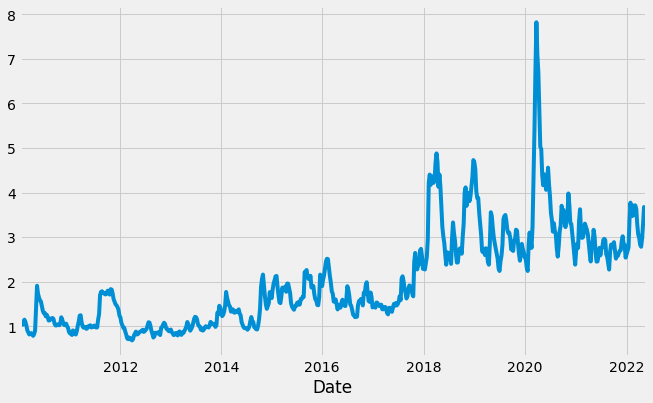

In [36]:
# Plot weekly atr values for MMM
weekly_atr.iloc[0,:].plot();

In [37]:
# Summary statistics
weekly_atr.T.describe()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,GS,HD,HON,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,2.030120,1.723798,2.723452,1.043934,4.254814,2.366847,1.610263,0.560622,0.508459,1.817493,4.046274,2.467327,1.843981,1.827452,0.727387,1.372694,1.477246,1.831291,0.845815,1.860915,1.269903,1.123243,2.791371,1.574294,3.412172,0.551639,1.934722,1.014112,1.229132
std,1.098203,1.319316,1.677894,1.221280,3.717874,1.443563,0.844378,0.349076,0.302795,1.304350,2.157083,2.378378,1.411366,0.608366,0.520211,0.884733,1.063113,1.446662,0.484700,2.169755,1.099506,0.787728,2.323825,1.029123,3.237878,0.249903,1.865854,0.403332,0.813038
min,0.684909,0.628394,0.601462,0.108684,0.806386,0.804174,0.599234,0.202967,0.191919,0.467461,1.650755,0.334001,0.488256,0.899929,0.186481,0.367798,0.535417,0.506089,0.266089,0.284980,0.216053,0.416506,0.417264,0.496899,0.562045,0.182069,0.272105,0.355102,0.412871
25%,1.097292,0.927354,1.235461,0.320071,1.492937,1.298918,1.047031,0.304776,0.327156,0.906341,2.556221,0.798547,0.871423,1.429238,0.360724,0.750248,0.730904,0.836122,0.500355,0.517460,0.481517,0.651828,1.254266,0.811666,1.024760,0.390507,0.630264,0.694351,0.697036
50%,1.678248,1.181996,2.490551,0.510353,2.255011,1.705330,1.319058,0.405380,0.417955,1.330969,3.405351,1.554038,1.248948,1.709754,0.489551,1.097987,1.049665,1.266552,0.708704,0.821527,0.844953,0.851022,1.655500,1.184564,2.024825,0.504762,1.085842,1.029365,0.901418
75%,2.738630,1.889414,3.700133,1.054586,7.196727,3.011986,1.940553,0.762869,0.588963,2.310773,4.398636,3.236891,2.437302,2.081275,1.034513,1.862119,1.850689,2.499896,1.082296,2.287627,1.573094,1.347543,3.567063,1.977849,5.291076,0.661882,2.640080,1.238591,1.544986
max,7.818705,8.534326,11.428004,5.847724,22.202176,6.946221,5.822203,2.437697,2.729952,8.119647,12.657733,14.735105,10.609192,5.868218,3.779689,6.552674,7.439127,12.231791,3.553750,10.139324,6.315018,6.551034,12.118897,7.472145,20.232688,2.354480,11.806197,3.153687,6.314879


## Elbow Plot

The number of clusters is a hyperparameter to clustering models and choose the optimal number of clusters is critical for the model. If every point is its own cluster, the inertia is zero and hence choosing the number of clusters that yields the lowest results in not appropriate. Instead, we need to identify the inflection point where increasing the number of clusters no longer result in significant drop in inertia. Elbow plot helps us to select the optimal number of clusters.

In [38]:
# Import sklearn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# import yfinance as yf
from datetime import datetime

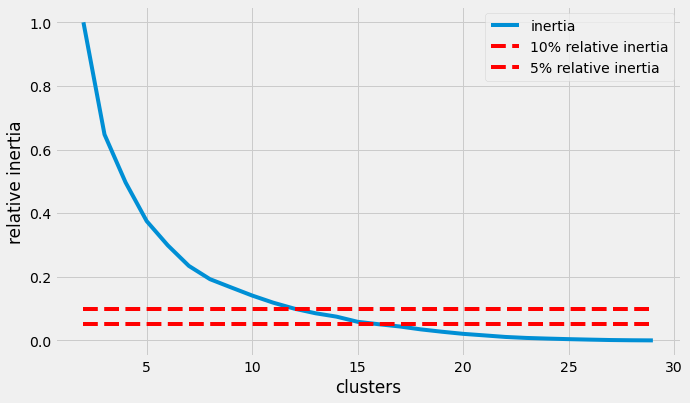

In [40]:
n_clusters = range(2, 30)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(weekly_atr)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters, np.divide(inertia,inertia[0]))
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

Silhouette Coefficient is another metric measure of how dense and separated are the clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. Silhouette coefficient implementation is straight forward where the average silhouette coefficient of all the samples is summarized into one score. The `silhouette_score` function needs a minimum of two clusters, or it will raise an exception.

## Build Clusters

We will now fit the cluster model. Given the timeseries characteristics, the dataset needs to be normalized for the model to work properly. The normalizing can be accomplished by using the `Normalizer` transformer from `Scikit-Learn`.

In [42]:
# Normalize and fit the model
model = Pipeline([
    ("normalization", MinMaxScaler()), 
    ("cluster", KMeans(n_clusters=15))
    ])

In [43]:
# Fit Model
model.fit(weekly_atr)

# Assign Label
labels = model.predict(weekly_atr)

In [44]:
# Check lables
labels

array([11,  1,  3, 14,  0,  9, 13,  2,  2,  1,  6, 12,  1,  5,  2,  7,  7,
        1,  2, 10,  7,  7,  4,  1,  8,  2, 10,  7,  7], dtype=int32)

In [45]:
# Remove DOW from the list
# companies = dow_stocks
# companies.remove('DOW')
companies = stock_atr.columns

# Remove Dow Inc from the compnay name
companies_name = dow_company_name
companies_name.remove('Dow')

In [46]:
# Create dataframe to hold cluster details
df = pd.DataFrame({'Cluster': labels, 
                    'Companies Name': companies_name,
                    'Companies': companies,
                    'ATR': weekly_atr.mean(axis=1),
                    'CHG': weekly_ret.mean(axis=1)}
                  ).sort_values(by=['Cluster'], axis = 0)

df = df.reset_index(drop=True)
df

,Cluster,Companies Name,Companies,ATR,CHG
0,0,Boeing,BA,4.254814,0.003214
1,1,McDonald's,MCD,1.831291,0.003009
2,1,American Express,AXP,1.723798,0.003270
3,1,Honeywell,HON,1.843981,0.003404
4,1,Disney,DIS,1.817493,0.002672
5,1,Travelers,TRV,1.574294,0.002900
6,2,Merck,MRK,0.845815,0.002503
7,2,Intel,INTC,0.727387,0.002433
8,2,Verizon,VZ,0.551639,0.002012
9,2,Cisco,CSCO,0.560622,0.002073


Thus, using k-means, we have discovered companies that exhibit similar volatility characteristics as measured by the Average True Range (ATR).

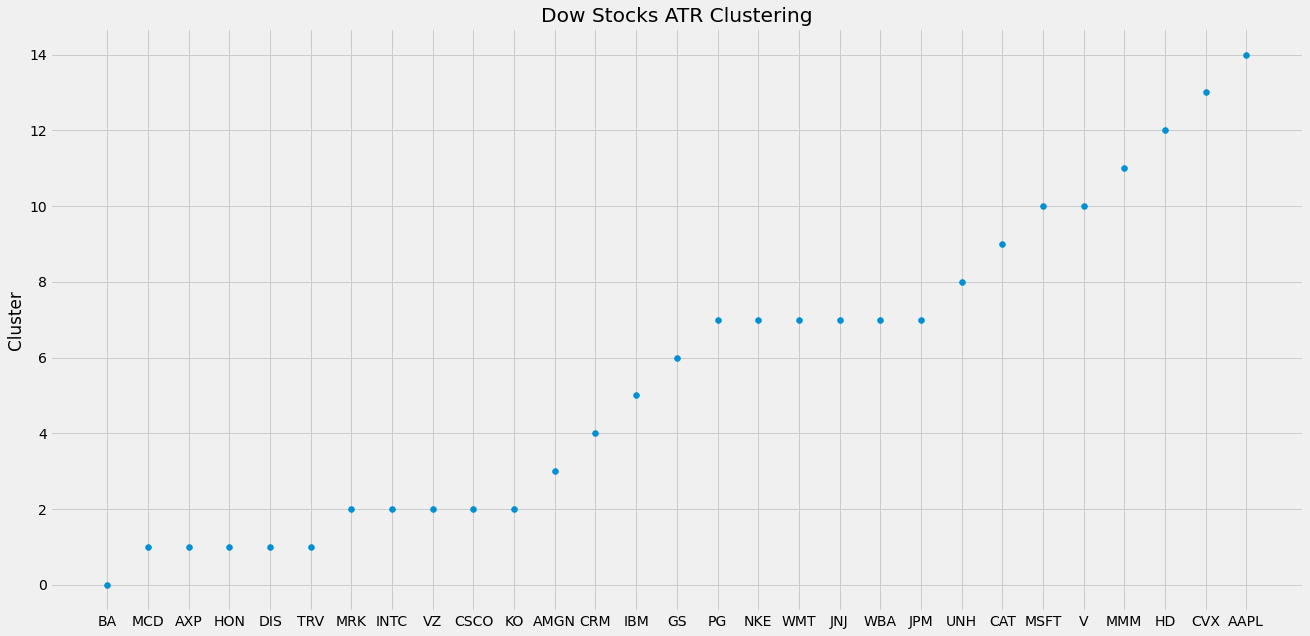

In [47]:
plt.figure(figsize=(20,10))
plt.scatter(df.Companies, df.Cluster)
# plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('Dow Stocks ATR Clustering');

In [48]:
model.get_params()

{'memory': None,
 'steps': [('normalization', MinMaxScaler()),
  ('cluster', KMeans(n_clusters=15))],
 'verbose': False,
 'normalization': MinMaxScaler(),
 'cluster': KMeans(n_clusters=15),
 'normalization__clip': False,
 'normalization__copy': True,
 'normalization__feature_range': (0, 1),
 'cluster__algorithm': 'auto',
 'cluster__copy_x': True,
 'cluster__init': 'k-means++',
 'cluster__max_iter': 300,
 'cluster__n_clusters': 15,
 'cluster__n_init': 10,
 'cluster__random_state': None,
 'cluster__tol': 0.0001,
 'cluster__verbose': 0}

In [49]:
model['cluster'].cluster_centers_

array([[0.28972272, 0.28972272, 0.28972272, ..., 0.53980093, 0.55505873,
        0.52896651],
       [0.13839659, 0.13839659, 0.13839659, ..., 0.28676036, 0.29308232,
        0.30701299],
       [0.05189605, 0.05189605, 0.05189605, ..., 0.02298164, 0.03216783,
        0.03671009],
       ...,
       [0.05053298, 0.05053298, 0.05053298, ..., 0.70599784, 0.77745927,
        0.78348998],
       [0.15049222, 0.15049222, 0.15049222, ..., 0.33874691, 0.34935612,
        0.34321005],
       [0.        , 0.        , 0.        , ..., 0.35987612, 0.36976946,
        0.38779507]])

In [50]:
model['cluster'].cluster_centers_.shape

(15, 647)

In [52]:
# Save locally to be used in SOM
df.to_csv('cluster_new.csv')